In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('../RAIN DATASET/rainfall in india 1901-2015.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [93]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [94]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [95]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [97]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [98]:
# Cleaning
# Handling missing values
df = df.dropna(subset=['ANNUAL'])  # Dropping rows where target variable (ANNUAL) is missing
df = df.drop(columns=['SUBDIVISION', 'YEAR'])  # Dropping non-contributing columns
df = df.fillna(df.mean())  # Filling missing values with the mean of respective columns


In [99]:
# Normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['ANNUAL'])), columns=df.columns[:-1])
df_scaled['ANNUAL'] = df['ANNUAL']  # Adding back the target variable


In [100]:
# Integration
# You can create additional features if needed, like adding the monthly values to get annual total
df_scaled['Total_Rainfall'] = df_scaled.iloc[:, 1:13].sum(axis=1)

In [101]:
# Example of using KNN imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)


In [102]:
# Example of checking explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Choose a threshold, e.g., 95%
pca = PCA(n_components=num_components)
df_reduced = pd.DataFrame(pca.fit_transform(df_imputed.iloc[:, :-2]), columns=[f'PC{i}' for i in range(1, num_components + 1)])
df_reduced['ANNUAL'] = df_imputed['ANNUAL']


In [103]:
X = df_reduced.drop('ANNUAL', axis=1)
y = df_reduced['ANNUAL']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [105]:
model.fit(X_train, y_train)


LinearRegression()

In [106]:
y_pred = model.predict(X_test)


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R-squared: {r2}')


MAE: 0.001841395500877623, MSE: 8.044357482587394e-06, R-squared: 0.9999999999906728


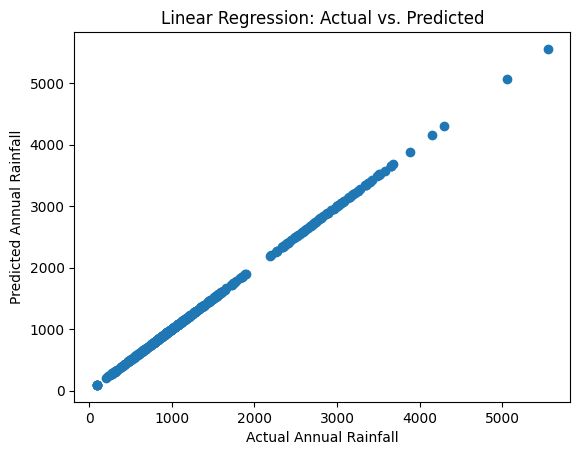

In [109]:

import matplotlib.pyplot as plt

plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

In [110]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10))


      Actual    Predicted
1621  1027.9  1027.901137
751   1607.3  1607.299603
2413   334.9   334.899188
266   2342.2  2342.203366
4075  1890.5  1890.498536
3949  2651.1  2651.103728
439   2404.5  2404.502292
25    2442.9  2442.904258
1272  1334.1  1334.099789
2543  3192.0  3191.997568


                Metric     Value
0  Mean Absolute Error  0.001841
1   Mean Squared Error  0.000008
2            R-squared  1.000000


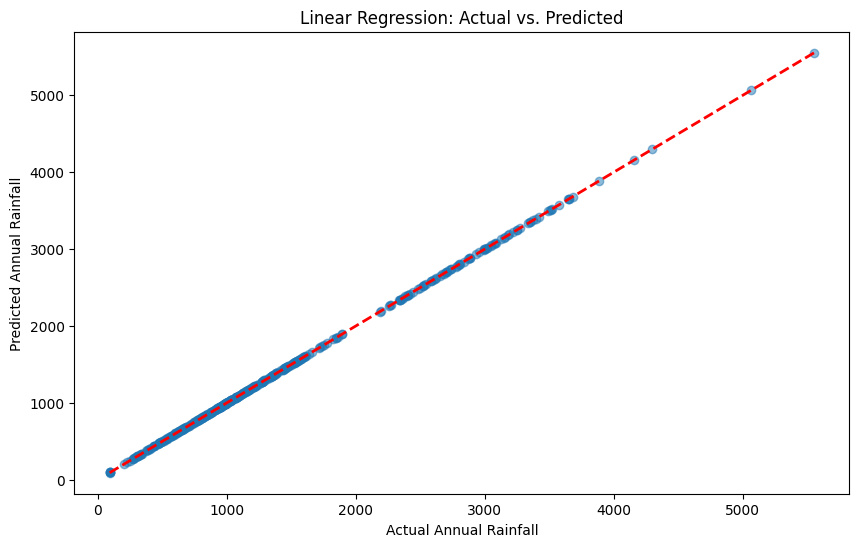

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are already defined

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a table for metrics
metrics_table = pd.DataFrame({'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared'],
                              'Value': [mae, mse, r2]})

# Display the table
print(metrics_table)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Predicted Annual Rainfall')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()


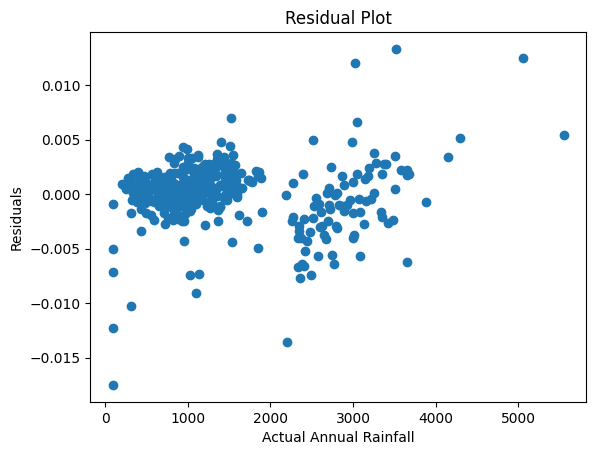

In [112]:
# Assuming you have a linear regression model named 'model'
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.xlabel('Actual Annual Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
